# Rio Grande Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
rio_grande_lims = pnboia_limits_tests.rio_grande

In [ ]:
buoys_df_raw.index.levels[0].unique()

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [4]:
# filter data with

rio_grande = filter_data(data=buoys_df_raw,
                    buoy='rio_grande',
                    limits=rio_grande_lims,
                    outlier_check=False,
                    t_continuity_check=False)

rio_grande = rio_grande.drop(columns=rio_grande.filter(regex='dir|head|spread').columns)

# Filter bad period
# rio_grande = rio_grande.loc[:'2017-05']

# Filter bad srad data
# rio_grande = rio_grande.where(rio_grande['srad'] < 1500)

# # Drop all-nans columns
# rio_grande.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

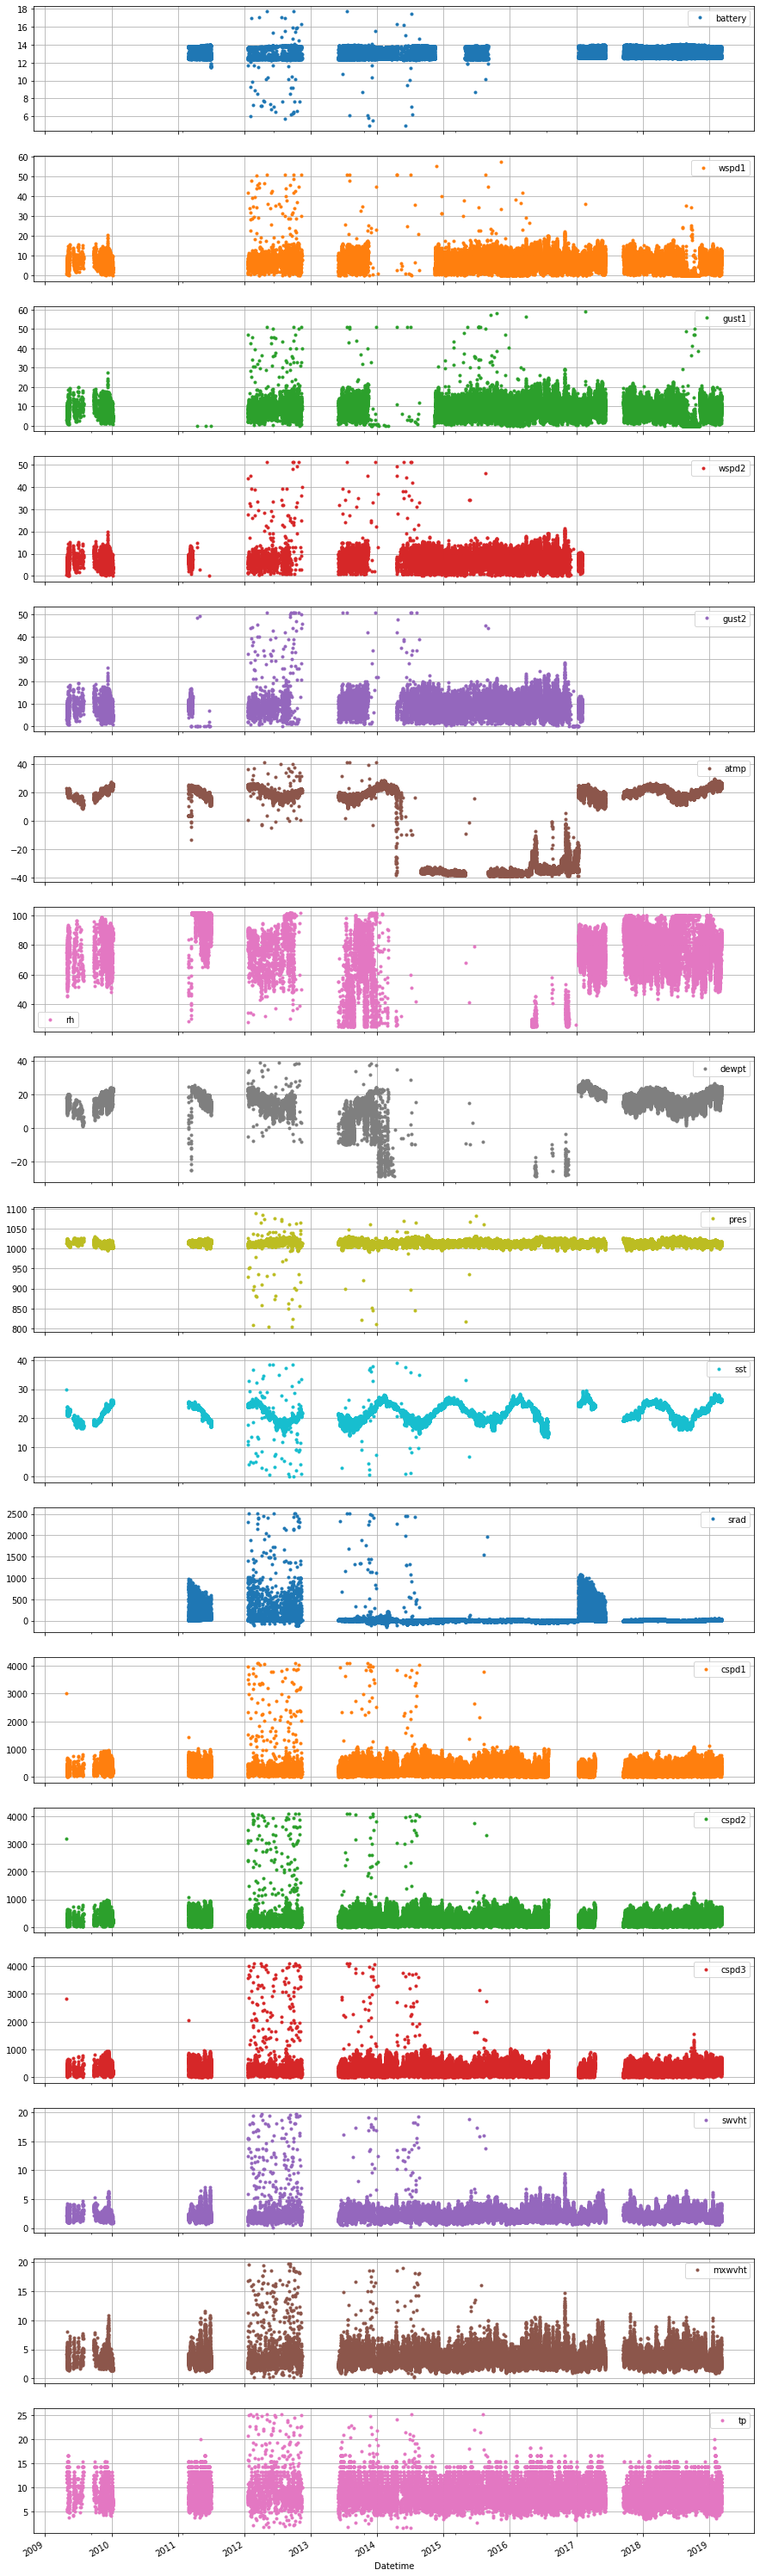

In [5]:
rio_grande.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

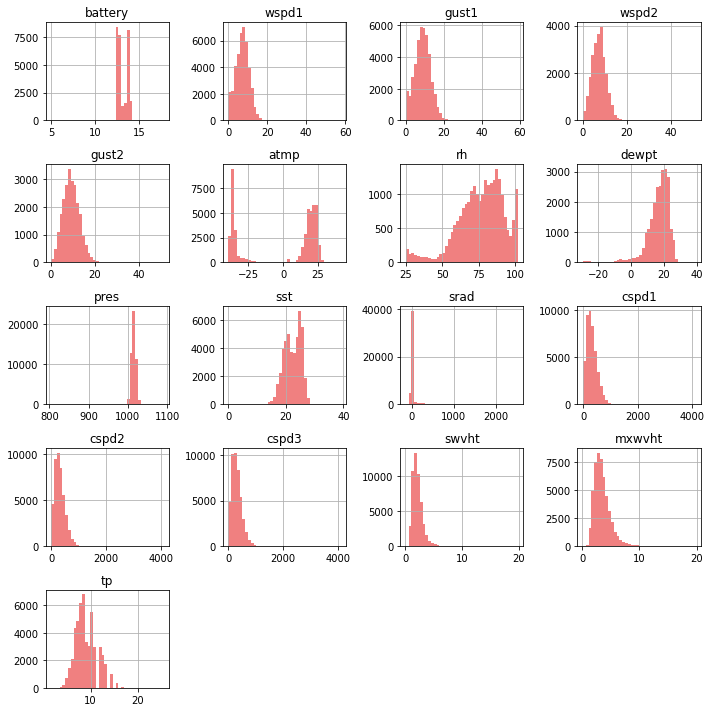

In [6]:
rio_grande.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [7]:
# Generated lims
rio_grande_out_lims_df_3 = gen_outlier_lim(rio_grande, buoy_name='rio_grande', std_factor=3).round(1)

# Generate lims dict
rio_grande_out_lims_dict_3 = manual_outlier_lims(rio_grande_out_lims_df_3, buoy_name='rio_grande')

# filter data with
rio_grande3 = filter_data(data=rio_grande,
                    buoy='rio_grande',
                    limits=rio_grande_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=rio_grande_out_lims_dict_3)

outlier_check done.


In [8]:
# Generated lims
rio_grande_out_lims_df_5 = gen_outlier_lim(rio_grande, buoy_name='rio_grande', std_factor=5).round(1)

# Generate lims dict
rio_grande_out_lims_dict_5 = manual_outlier_lims(rio_grande_out_lims_df_5, buoy_name='rio_grande')

# filter data with
rio_grande2 = filter_data(data=rio_grande,
                    buoy='rio_grande',
                    limits=rio_grande_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=rio_grande_out_lims_dict_5)

outlier_check done.


In [9]:
rio_grande_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.4,3.7,3.0,11.1,0.0,18.5
gust1,9.1,4.4,3.0,13.3,0.0,22.3
wspd2,7.5,3.5,3.0,10.6,0.0,18.0
gust2,9.3,4.1,3.0,12.4,0.0,21.7
atmp,-0.3,26.8,3.0,80.5,0.0,80.2
rh,76.5,15.7,3.0,47.2,29.4,123.7
dewpt,16.7,7.3,3.0,21.9,0.0,38.6
pres,1014.6,6.7,3.0,20.2,994.4,1034.8
sst,22.4,2.9,3.0,8.8,13.6,31.1


In [10]:
rio_grande_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.4,3.7,5.0,18.5,0.0,25.9
gust1,9.1,4.4,5.0,22.2,0.0,31.2
wspd2,7.5,3.5,5.0,17.6,0.0,25.1
gust2,9.3,4.1,5.0,20.7,0.0,30.0
atmp,-0.3,26.8,5.0,134.2,0.0,133.8
rh,76.5,15.7,5.0,78.6,0.0,155.2
dewpt,16.7,7.3,5.0,36.6,0.0,53.2
pres,1014.6,6.7,5.0,33.7,980.9,1048.3
sst,22.4,2.9,5.0,14.7,7.7,37.0


# Testing generated limits

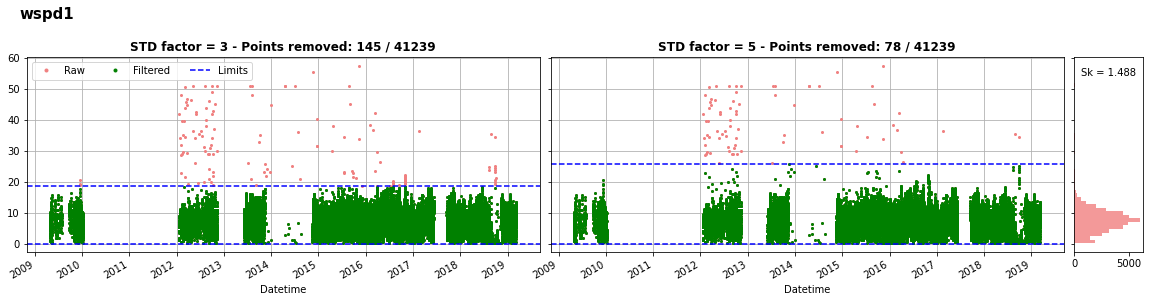

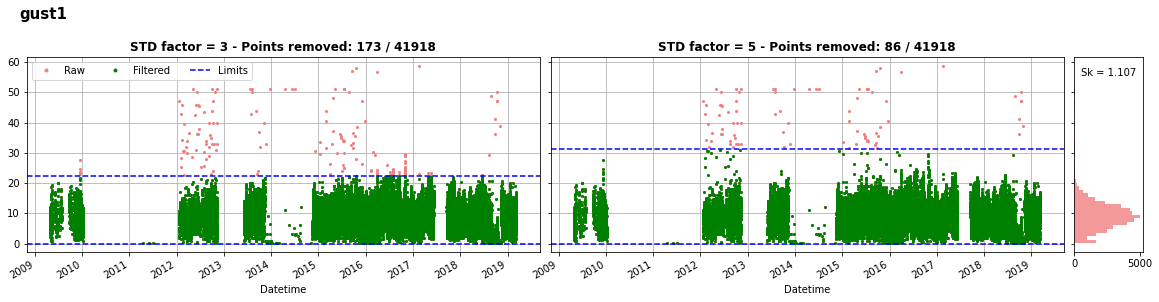

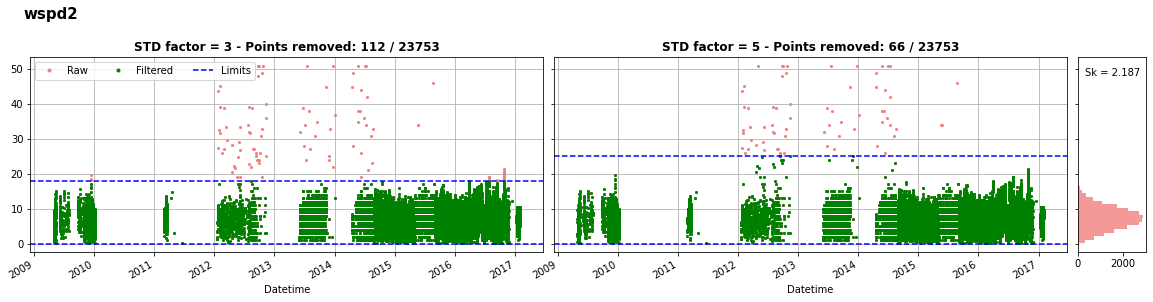

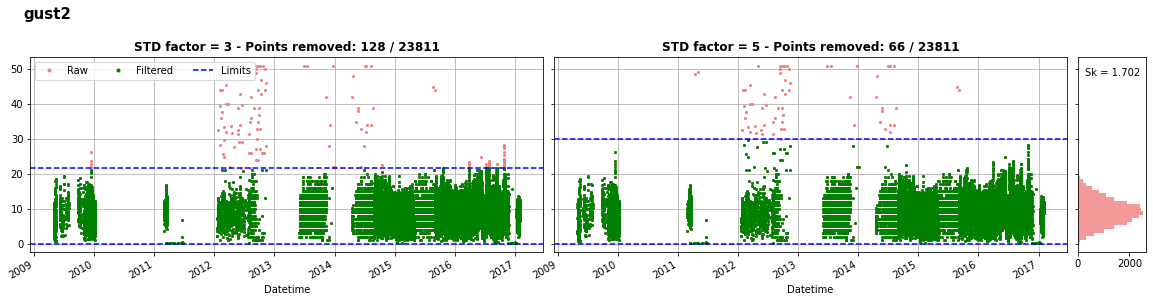

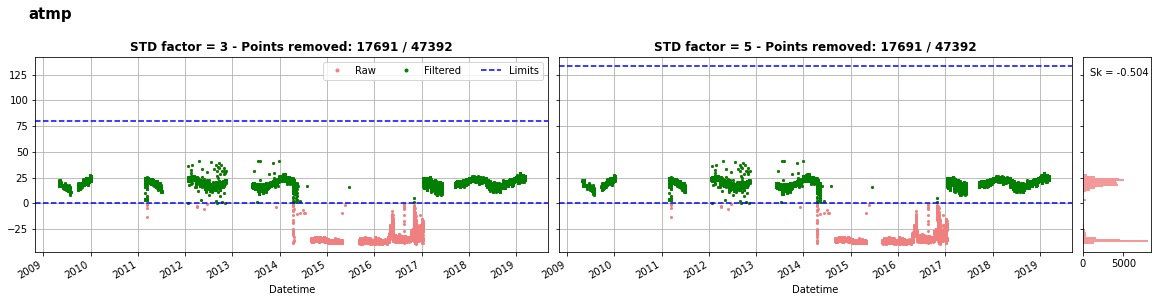

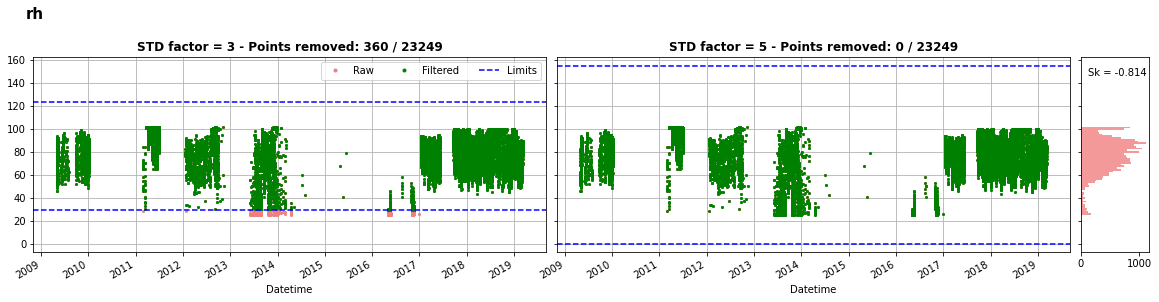

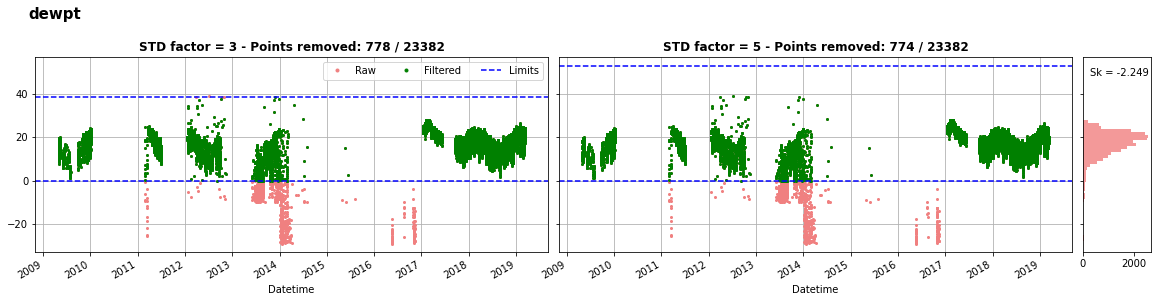

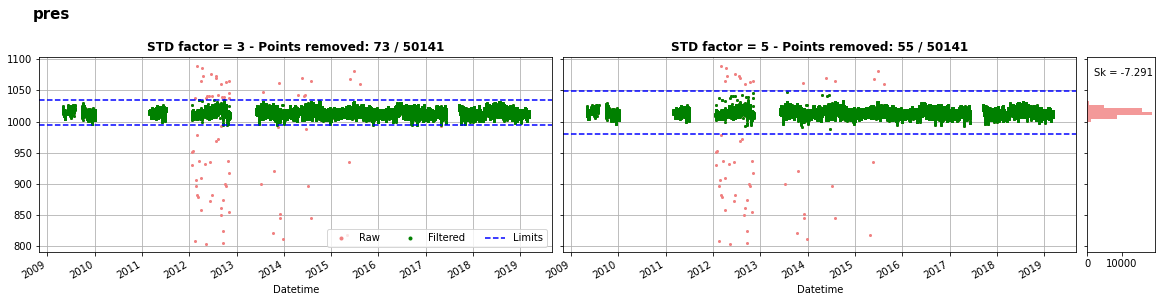

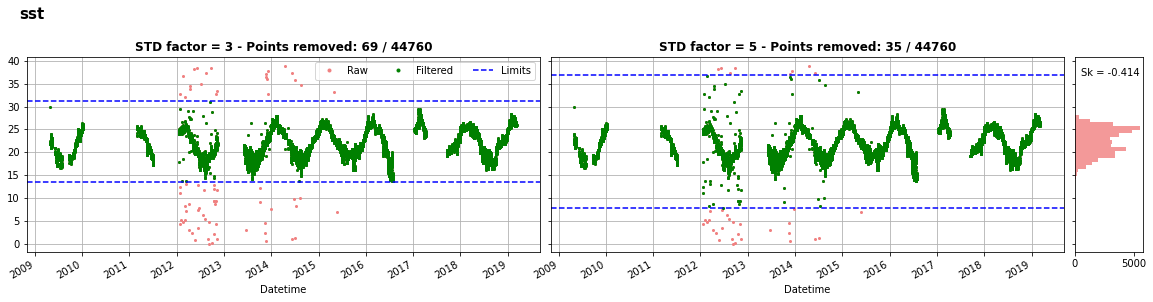

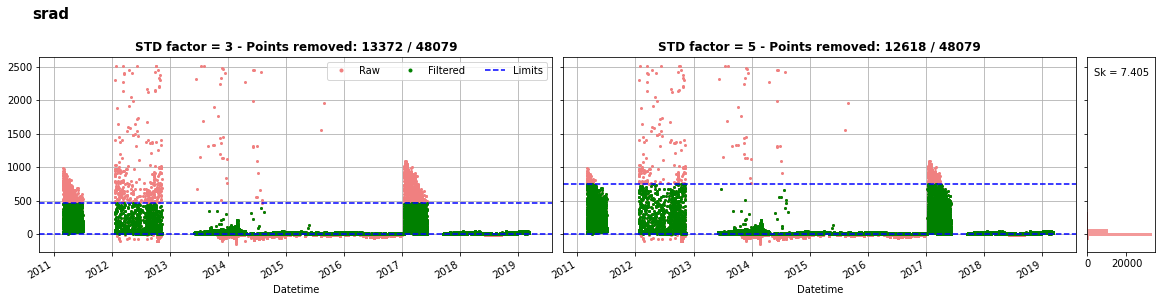

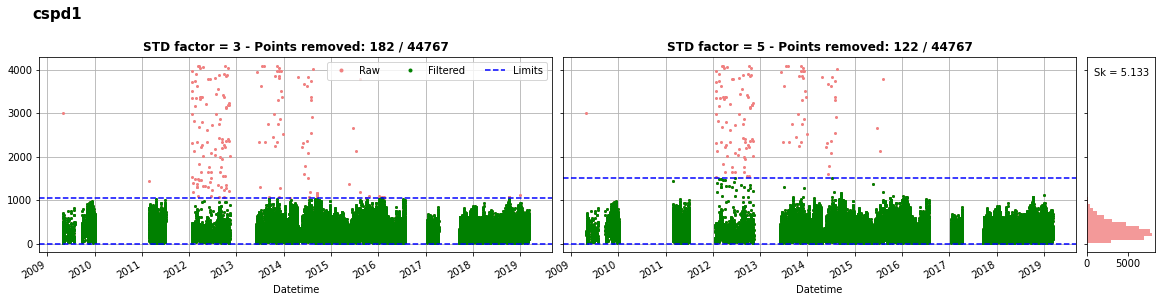

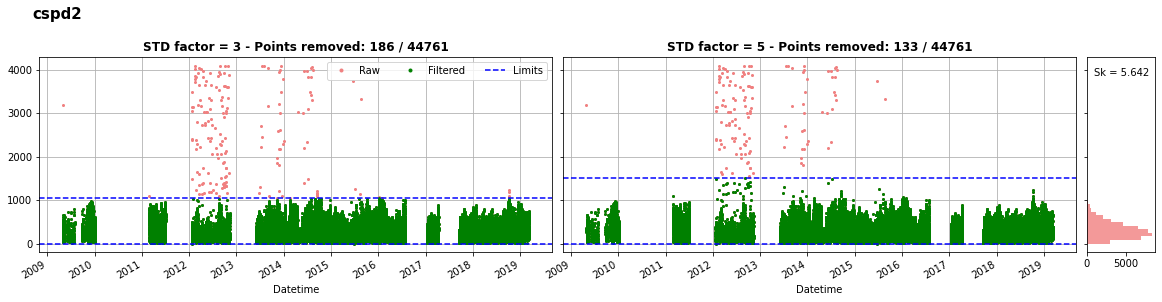

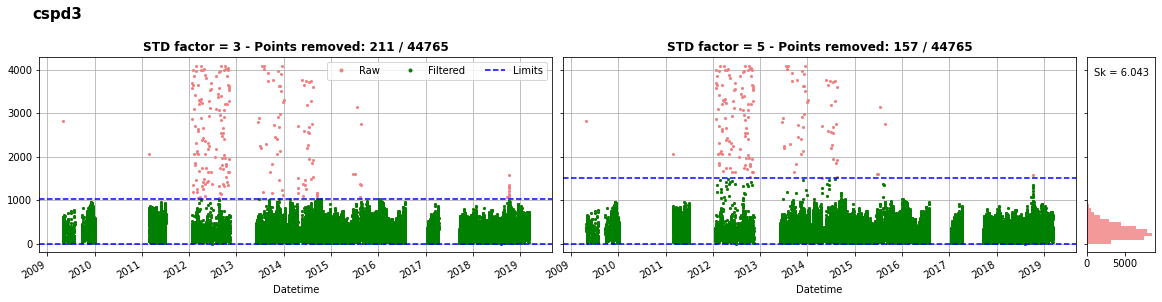

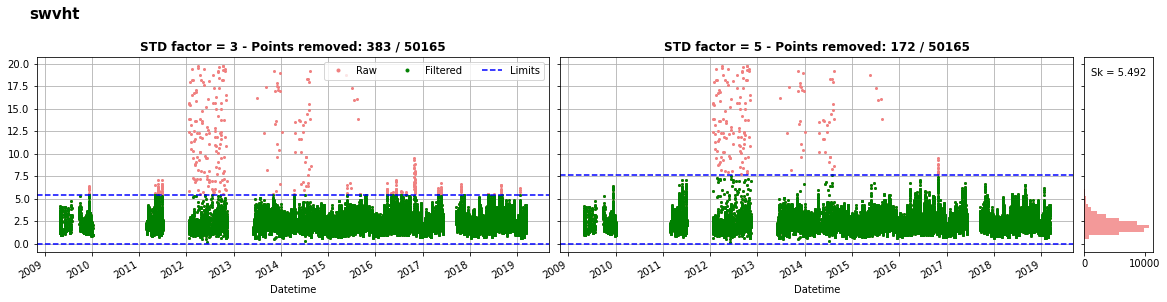

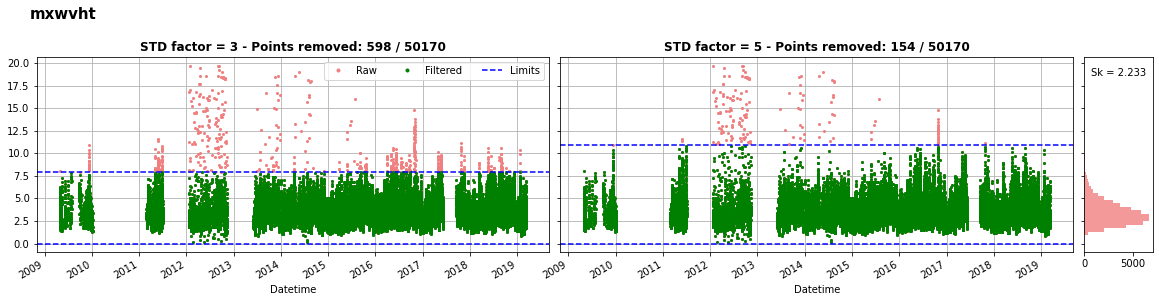

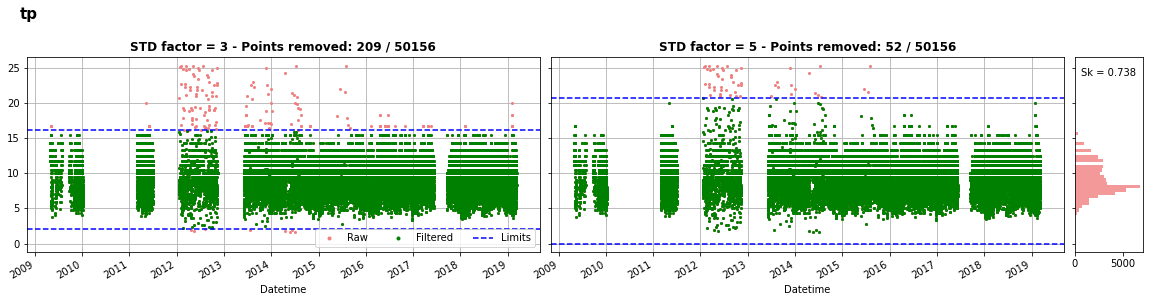

In [11]:
parameters = rio_grande.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=rio_grande,
                    limits=rio_grande_lims,
                    buoy='rio_grande',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

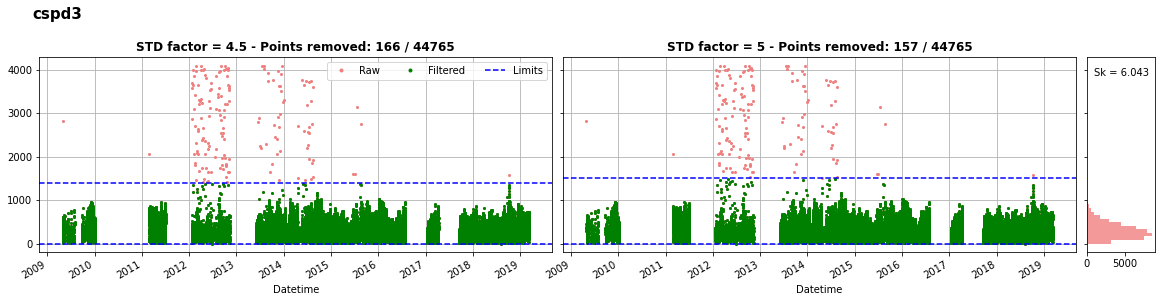

In [48]:
param = 'cspd3'
plot_comparison(factor1=4.5, 
                    factor2=5, 
                    data=rio_grande,
                    limits=rio_grande_lims,
                    buoy='rio_grande',
                    parameter=param)
plt.show()

In [49]:
factors = {
    "swvht": 8,
    "mxwvht": 9,
    "tp": 6,
    "wspd1": 5,
    "gust1": 5,
    "wspd2": 5,
    "gust2": 5,
    "rh": 2.5,
    "srad": 8,
    "atmp": 1.5,
    "pres": 5,
    "dewpt": 2,
    "sst": 3,
    "tp": 5,
    "cspd1": 4.5,
    "cspd2": 4.5,
    "cspd3": 5,
    }

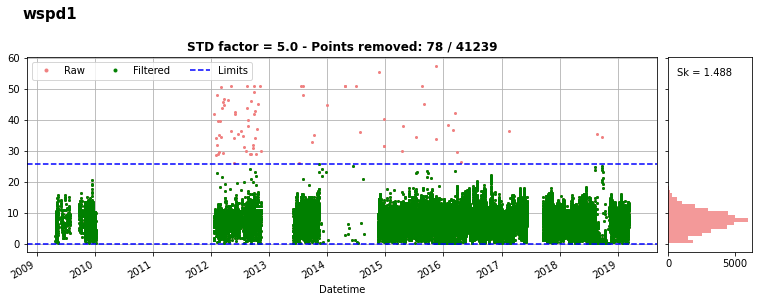

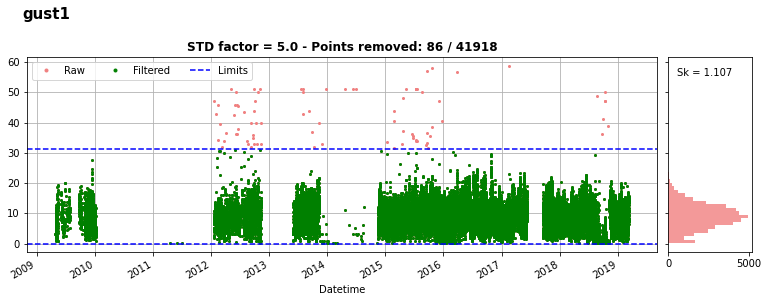

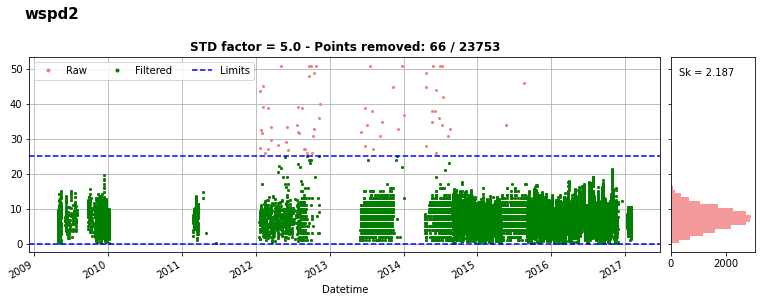

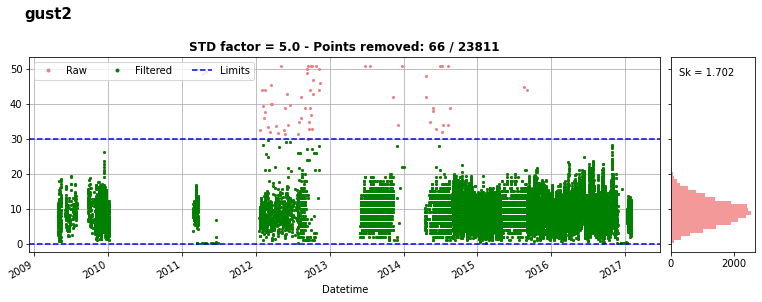

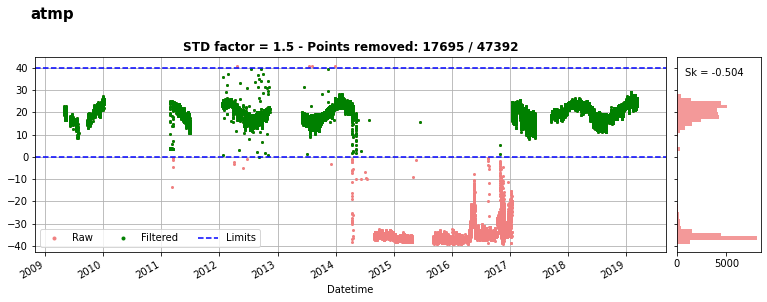

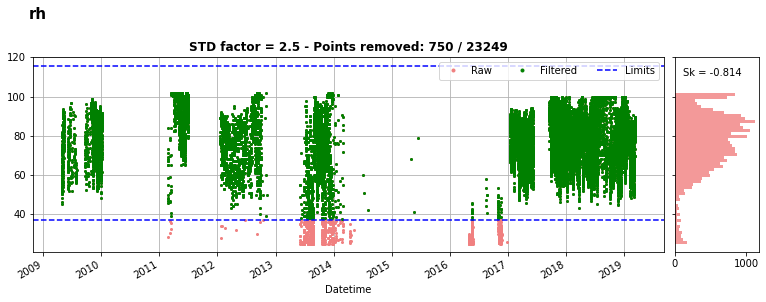

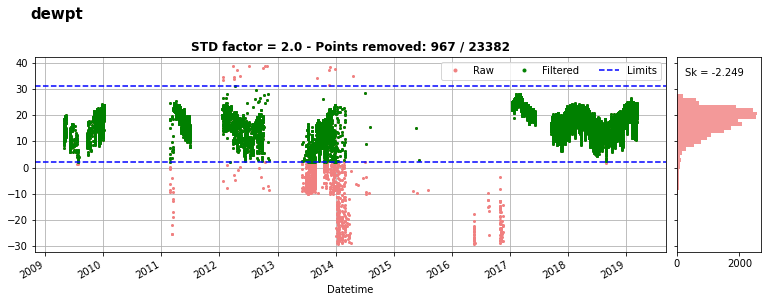

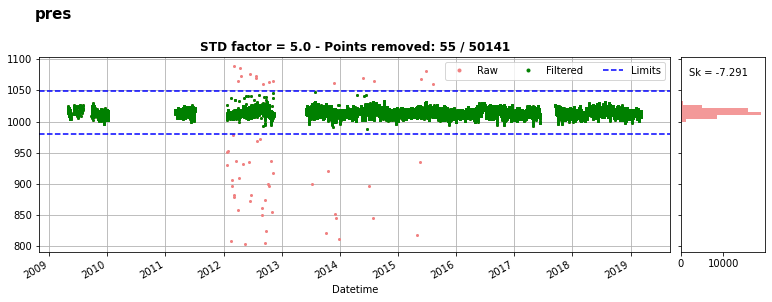

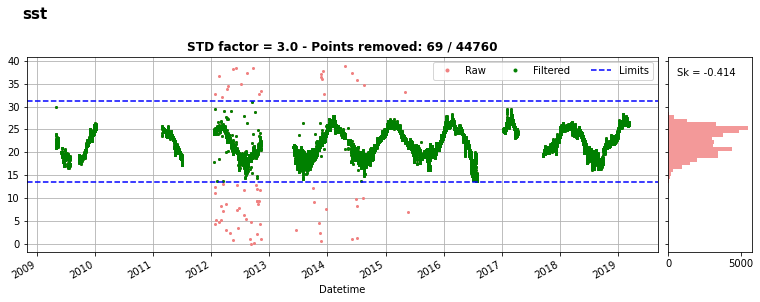

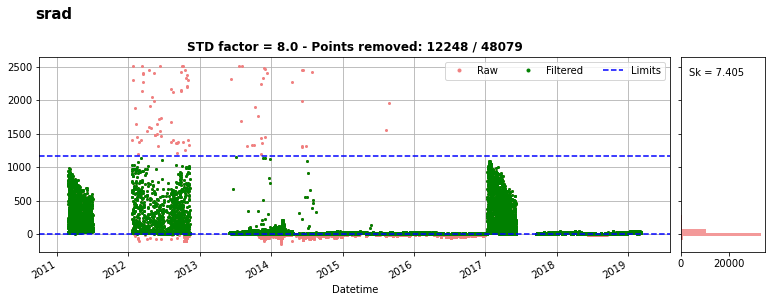

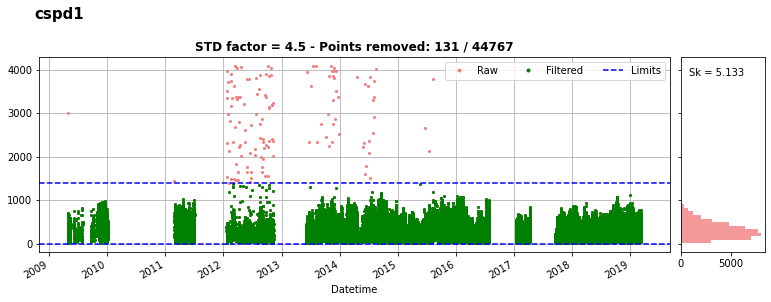

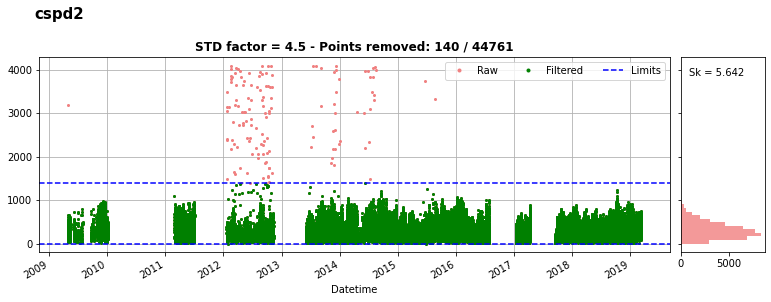

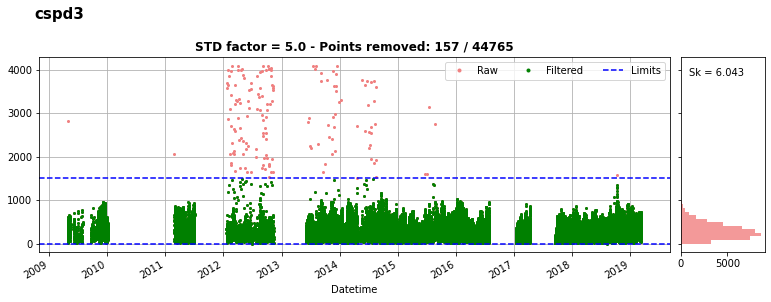

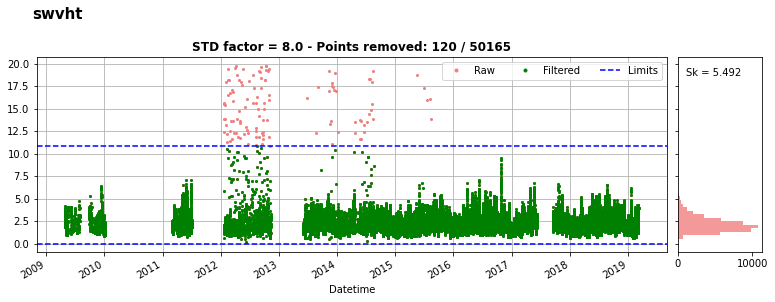

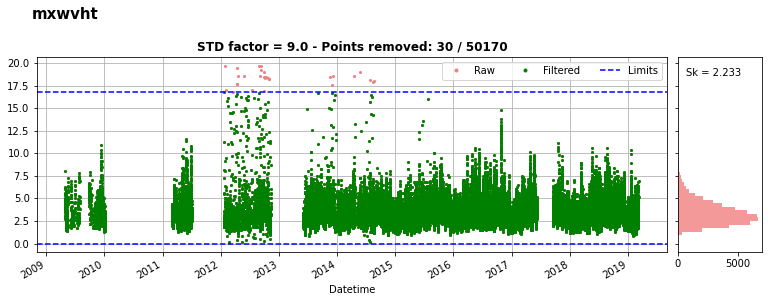

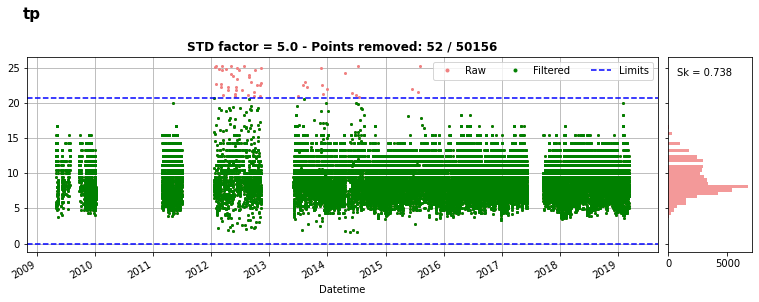

In [50]:
# FILTERING WITH DEFINITIVE FACTORS
rio_grande_notdir = rio_grande.drop(columns=rio_grande.filter(regex='dir|head|spread').columns)
parameters = rio_grande_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=rio_grande,
                    limits=rio_grande_lims,
                    buoy='rio_grande',
                    parameter=param)
    plt.show()

In [51]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 8,
    "mxwvht": 9,
    "tp": 6,
    "wspd1": 5,
    "gust1": 5,
    "wspd2": 5,
    "gust2": 5,
    "rh": 2.5,
    "srad": 8,
    "atmp": 1.5,
    "pres": 5,
    "dewpt": 2,
    "sst": 3,
    "tp": 5,
    "cspd1": 4.5,
    "cspd2": 4.5,
    "cspd3": 5,
    }

rio_grande_out_lims_df = gen_outlier_lim(data=rio_grande,
                                     buoy_name='rio_grande',
                                     std_factor=factors).round(1)

In [52]:
rio_grande_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,7.4,3.7,5.0,18.5,0.0,25.9
gust1,9.1,4.4,5.0,22.2,0.0,31.2
wspd2,7.5,3.5,5.0,17.6,0.0,25.1
gust2,9.3,4.1,5.0,20.7,0.0,30.0
atmp,-0.3,26.8,1.5,40.2,0.0,39.9
rh,76.5,15.7,2.5,39.3,37.2,115.9
dewpt,16.7,7.3,2.0,14.6,2.0,31.3
pres,1014.6,6.7,5.0,33.7,980.9,1048.3
sst,22.4,2.9,3.0,8.8,13.6,31.1


In [53]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
rio_grande_out_lims_dict = manual_outlier_lims(rio_grande_out_lims_df, buoy_name='rio_grande')

In [54]:
rio_grande_out_lims_dict

{'wspd1': [0.0, 25.9],
 'gust1': [0.0, 31.2],
 'wspd2': [0.0, 25.1],
 'gust2': [0.0, 30.0],
 'atmp': [0.0, 39.9],
 'rh': [37.2, 115.9],
 'dewpt': [2.0, 31.3],
 'pres': [980.9, 1048.3],
 'sst': [13.6, 31.1],
 'srad': [0.0, 1167.1],
 'cspd1': [0.0, 1394.7],
 'cspd2': [0.0, 1399.4],
 'cspd3': [0.0, 1506.0],
 'swvht': [0.0, 10.9],
 'mxwvht': [0.0, 16.8],
 'tp': [0.0, 20.7]}

In [42]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
rio_grande_definitive = filter_data(data=buoys_df_raw,
                    buoy='rio_grande',
                    limits=rio_grande_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=rio_grande_out_lims_dict)

outlier_check done.
